First add the data functions to the path

In [10]:
import sys
import numpy as np
import pandas as pd
import copy
from netCDF4 import Dataset
from pathlib import Path
from datetime import datetime
notebook_dir = !pwd # Replace with !echo %cd% if using windows
library_dir = Path(notebook_dir[0]).parent.absolute()
sys.path.append(str(library_dir))
data_raw_path = library_dir / 'data' / 'raw'

from src.data.adcp_mission_analysis import adcp_import_data, add_dive_averages, read_glider_nc
#from src.data.beam_mapping import beam2enu, beam_from_center, caltran

Use better plotting defaults

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style_path = library_dir / 'src' / 'visualization' / 'presentation.mplstyle'
style.use(str(style_path))

Get an overview of the dataset

In [3]:
overview, mission_dict = adcp_import_data(data_raw_path)
overview

,file_path,dive_limb,averaging_interval,powerusage_mW,mem_usage_MB_per_hour,cell_size,measurement_interval,num_cells,num_pings,blank_dist,vert_direction
0001a,/home/callum/Documents/adcp-glider/data/raw/cp...,a,1,184.039993,0.061,2.0,15,15,4,0.3,Descent
0001b,/home/callum/Documents/adcp-glider/data/raw/cp...,b,1,184.039993,0.061,2.0,15,15,4,0.3,Ascent
0002a,/home/callum/Documents/adcp-glider/data/raw/cp...,a,1,184.039993,0.061,2.0,15,15,4,0.3,Descent
0002b,/home/callum/Documents/adcp-glider/data/raw/cp...,b,1,184.039993,0.061,2.0,15,15,4,0.3,Ascent
0003a,/home/callum/Documents/adcp-glider/data/raw/cp...,a,1,184.039993,0.061,2.0,15,15,4,0.3,Descent
...,...,...,...,...,...,...,...,...,...,...,...
0153b,/home/callum/Documents/adcp-glider/data/raw/cp...,b,1,184.039993,0.061,2.0,15,15,4,0.3,Ascent
0154a,/home/callum/Documents/adcp-glider/data/raw/cp...,a,1,184.039993,0.061,2.0,15,15,4,0.3,Descent
0154b,/home/callum/Documents/adcp-glider/data/raw/cp...,b,1,184.039993,0.061,2.0,15,15,4,0.3,Ascent
0155a,/home/callum/Documents/adcp-glider/data/raw/cp...,a,1,184.039993,0.061,2.0,15,15,4,0.3,Descent


Add beam attributes. These are taken from the fifth cell. 11.3 m from the glider on default settings.

In [4]:
beam_attrs, adcp_df = add_dive_averages(overview, mission_dict)
beam_attrs
# overview.join(beam_attrs)

,cor_beam_1,cor_beam_2,cor_beam_3,cor_beam_4,amp_beam_1,amp_beam_2,amp_beam_3,amp_beam_4,beam_miss,pitch,roll,heading,good_angle
0001a,NaN,20.1064,16.4255,17.2128,NaN,29.6702,29.0426,29.3511,2.6974,-42.6309,4.44085,235.983,6.38298
0001b,46.8214,48.8571,NaN,46.3214,33.6964,33.2946,NaN,32.8571,1.87585,-12.9293,4.59,184.709,32.1429
0002a,NaN,63.5455,62.8,62.7091,NaN,34.8818,34.5636,34.3455,1.60773,-29.5591,5.61491,115.971,40
0002b,88.1833,87.6667,NaN,86.35,37.8167,37.2583,NaN,36.7417,0.898507,16.1588,5.542,134.029,60
0003a,NaN,73.8457,75.9074,73.6296,NaN,33.2438,33.7346,33.0463,0.821654,-16.9001,4.67148,115.131,54.9383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0153b,96.5814,96.0698,NaN,95.6977,42.7674,42.1163,NaN,41.5233,0.77738,25.4237,2.5007,106.602,83.7209
0154a,NaN,92.7059,93.2353,94.7059,NaN,39.0294,40.4706,39.7059,1.54943,-26.01,3.98588,35.48,47.0588
0154b,95.7857,95.1429,NaN,95.1429,41.7143,41,NaN,40.6429,0.983536,24.1043,4.05286,97.7407,64.2857
0155a,NaN,93.8889,91.9259,93.5926,NaN,39.6481,40.0926,39,1.37718,-26.317,4.59037,180.342,33.3333


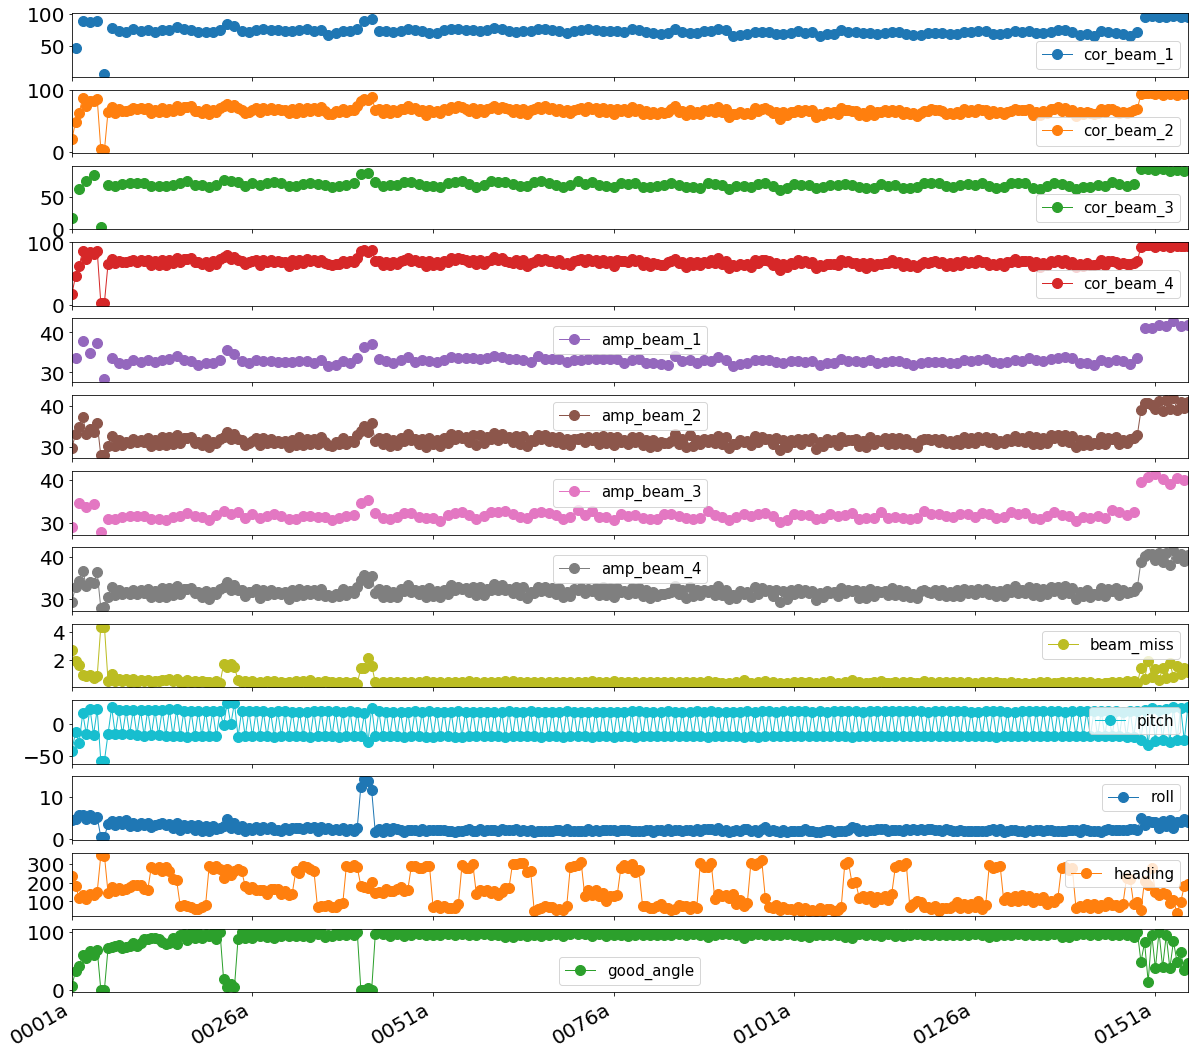

In [5]:
beam_attrs.plot(subplots=True,figsize=(20,20),marker='o');

Load in glider attitude data for comparison

In [8]:
glider_df = read_glider_nc(Path('/home/callum/Documents/Eureka/data/glider-nc-transfer/full-nc'))

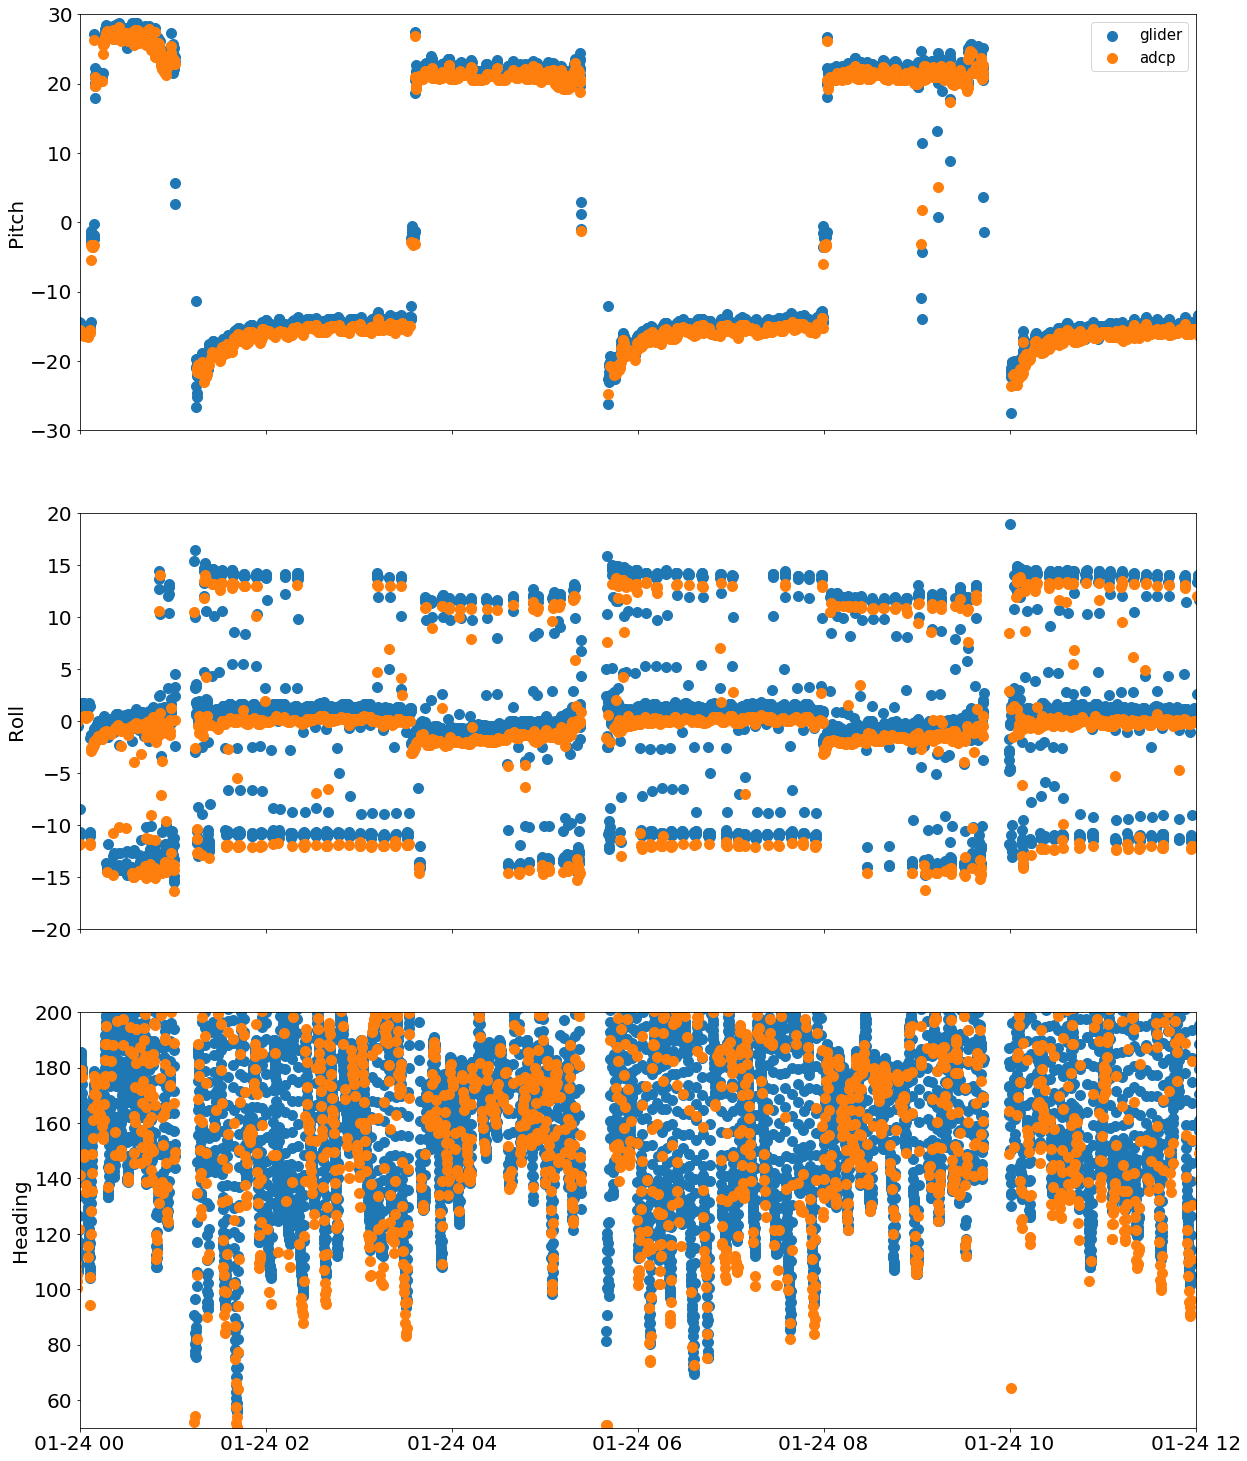

In [11]:
fig, ax = plt.subplots(3,1,figsize=(20,26), sharex=True)
ax = ax.ravel()
ax[0].scatter(glider_df.index, glider_df.pitch_gl, label='glider')
ax[0].scatter(adcp_df.index, adcp_df.pitch_ad, label='adcp')
ax[0].set(xlim=[datetime(2020,1,24,0), datetime(2020,1,24,12)], ylim=[-30,30], ylabel='Pitch')
ax[1].scatter(glider_df.index, glider_df.roll_gl)
ax[1].scatter(adcp_df.index, adcp_df.roll_ad)
ax[1].set(ylim=[-20,20], ylabel='Roll')
ax[2].scatter(glider_df.index, glider_df.heading_gl)
ax[2].scatter(adcp_df.index, adcp_df.heading_ad)
ax[2].set(ylim=[50,200], ylabel='Heading')
ax[0].legend();

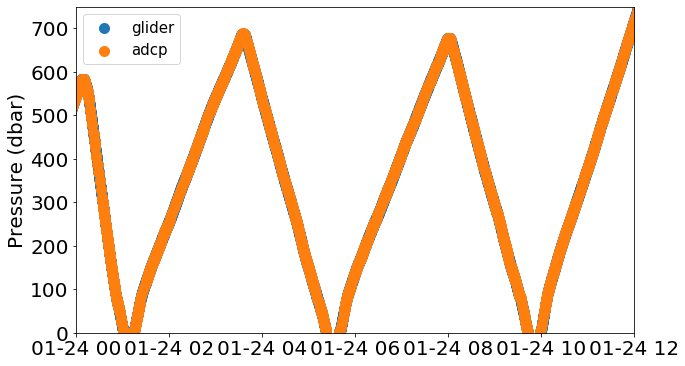

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(glider_df.index, glider_df.pressure_gl, label='glider')
ax.scatter(adcp_df.index, adcp_df.pressure_ad, label='adcp')
ax.set(xlim=[datetime(2020,1,24,0), datetime(2020,1,24,12)],ylim = [0,750], ylabel='Pressure (dbar)')
ax.legend()

After 40 dives, the glider should be trimmed and on deep dives. we will use this as a sample dive to check coordinate transforms

In [13]:
foo = mission_dict['0041a']
bar = mission_dict['0041b']

Plot the xyz velocites from one dive cycle. Upper panel dive, lower panel climb

[(-0.4, 0.4), (-0.25, 0.0), Text(0.5, 0, 'w from pressure m/s')]

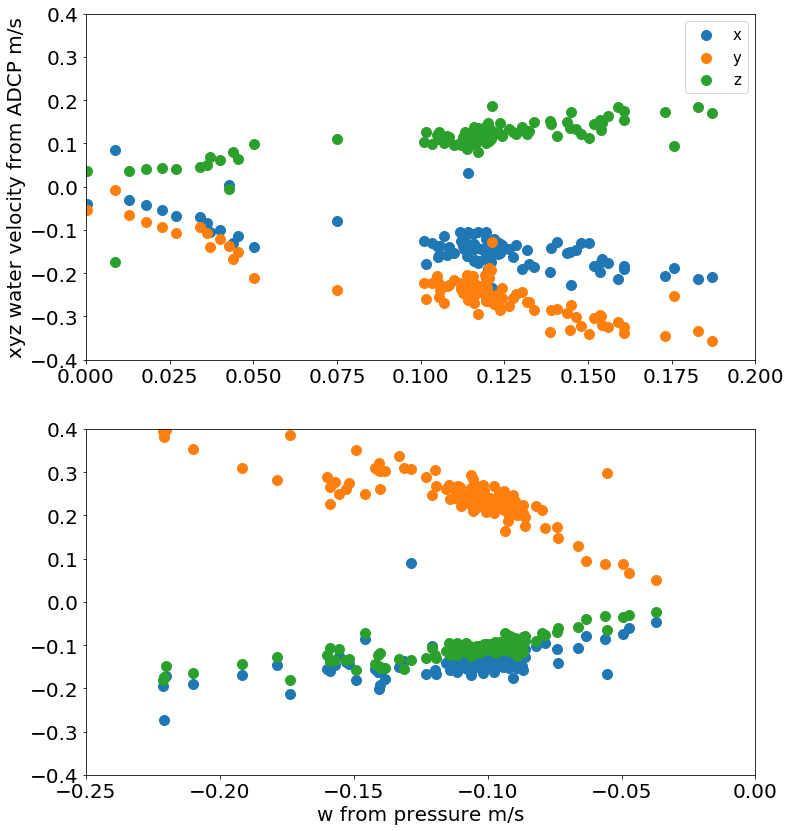

In [14]:
fig, ax = plt.subplots(2,1, figsize=(12,14), sharex=False)
ax = ax.ravel()
ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,0,0][:-1], label='x')
ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,0,1][:-1], label='y')
ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,0,2][:-1], label='z')
ax[0].set(xlim=[0,0.2], ylim=[-0.4,0.4],ylabel='xyz water velocity from ADCP m/s')
ax[0].legend()
ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,0,0][:-1], label='x')
ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,0,1][:-1], label='y')
ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,0,2][:-1], label='z')
ax[1].set(xlim=[-0.25,0.], ylim=[-0.4,0.4], xlabel='w from pressure m/s')

As above for enu velocites

[(-0.4, 0.4), (-0.25, 0.0), Text(0.5, 0, 'w from pressure m/s')]

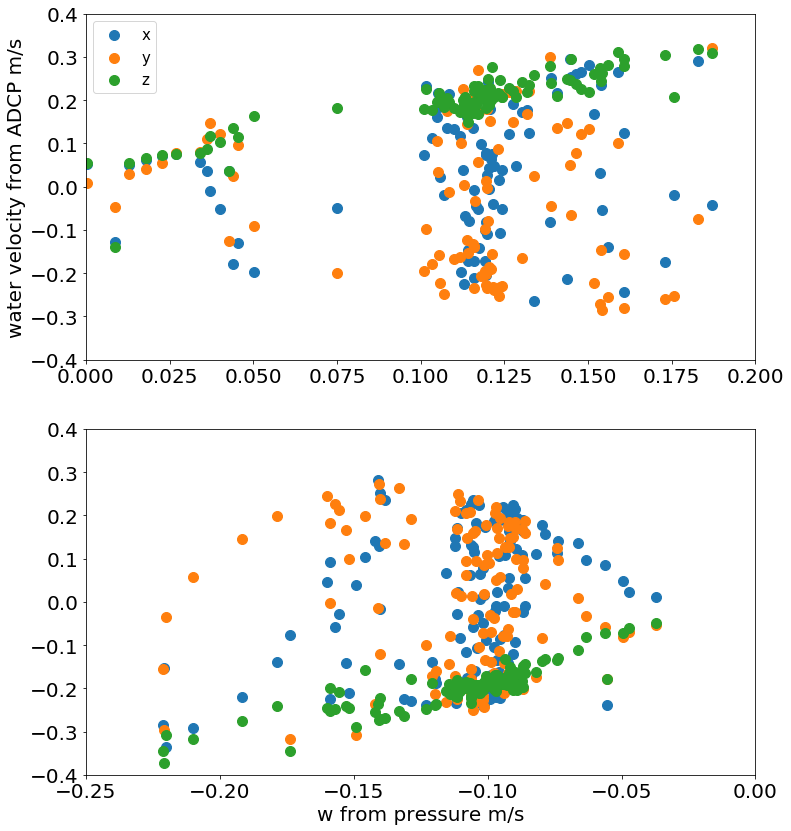

In [15]:
fig, ax = plt.subplots(2,1, figsize=(12,14), sharex=False)
ax = ax.ravel()
ax[0].scatter(-foo.glider_w_from_p,foo.vel_enu[:,0,0][:-1], label='x')
ax[0].scatter(-foo.glider_w_from_p,foo.vel_enu[:,0,1][:-1], label='y')
ax[0].scatter(-foo.glider_w_from_p,foo.vel_enu[:,0,2][:-1], label='z')
ax[0].set(xlim=[0,0.2], ylim=[-0.4,0.4],ylabel='water velocity from ADCP m/s')
ax[0].legend()
ax[1].scatter(-bar.glider_w_from_p,bar.vel_enu[:,0,0][:-1], label='x')
ax[1].scatter(-bar.glider_w_from_p,bar.vel_enu[:,0,1][:-1], label='y')
ax[1].scatter(-bar.glider_w_from_p,bar.vel_enu[:,0,2][:-1], label='z')
ax[1].set(xlim=[-0.25,0.], ylim=[-0.4,0.4], xlabel='w from pressure m/s')

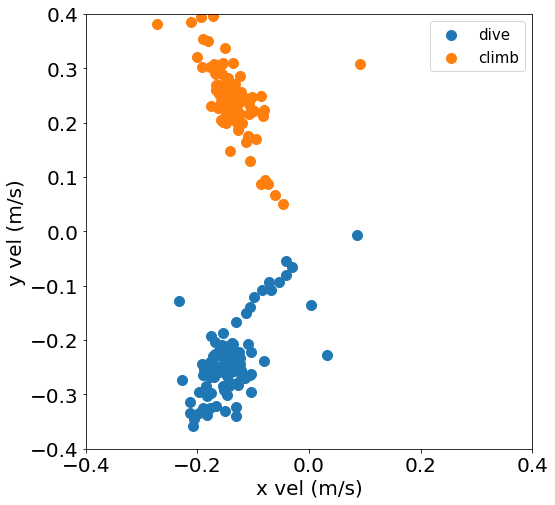

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(foo.vel_xyz[:,0,0][:-1],foo.vel_xyz[:,0,1][:-1], label='dive')
ax.scatter(bar.vel_xyz[:,0,0][:-1],bar.vel_xyz[:,0,1][:-1], label='climb')
#ax.scatter(-bar.glider_w_from_p,bar.vel_xyz[:,0,1][:-1], label='y')
#ax.scatter(-bar.glider_w_from_p,bar.vel_xyz[:,0,2][:-1], label='z')
ax.set(xlim=[-0.4,0.4], ylim=[-0.4,0.4], xlabel='x vel (m/s)',ylabel='y vel (m/s)')
ax.legend()

In [17]:
print(len(foo.heading))
print(len(foo.vel_enu[:,0,0][:-1]))

97
96


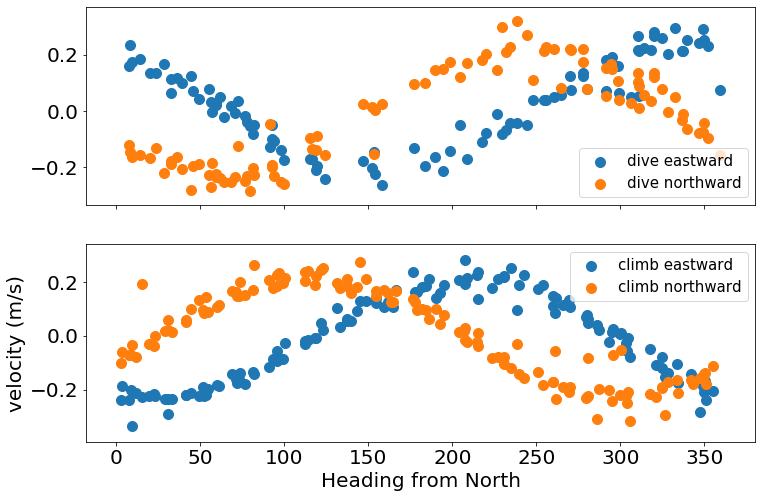

In [18]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(12,8))
ax[0].scatter(foo.heading[:-1], foo.vel_enu[:,0,0][:-1], label='dive eastward')
ax[0].scatter(foo.heading[:-1], foo.vel_enu[:,0,1][:-1], label='dive northward')
ax[1].scatter(bar.heading[:-1], bar.vel_enu[:,0,0][:-1], label='climb eastward')
ax[1].scatter(bar.heading[:-1], bar.vel_enu[:,0,1][:-1], label='climb northward')
ax[1].set(xlabel='Heading from North',ylabel='velocity (m/s)')
ax[1].legend()
ax[0].legend();

In [19]:
mens = []
mene = []
menn = []
menu = []
for ident in list(mission_dict):
    mens.append(np.nanmedian(np.abs(mission_dict[ident].vel_enu)))
    mene.append(np.nanmedian(mission_dict[ident].vel_enu[:,:,0]))
    menn.append(np.nanmedian(mission_dict[ident].vel_enu[:,:,1]))
    menu.append(np.nanmedian(mission_dict[ident].vel_enu[:,:,2]))

In [20]:
xens = []
xene = []
xenn = []
xenu = []
for ident in list(mission_dict):
    xens.append(np.nanmedian(np.abs(mission_dict[ident].vel_xyz)))
    xene.append(np.nanmedian(mission_dict[ident].vel_xyz[:,:,0]))
    xenn.append(np.nanmedian(mission_dict[ident].vel_xyz[:,:,1]))
    xenu.append(np.nanmedian(mission_dict[ident].vel_xyz[:,:,2]))

In [21]:
bens = []
bene = []
benn = []
benu = []
for ident in list(mission_dict):
    bens.append(np.nanmedian(np.abs(mission_dict[ident].vel_beam)))
    bene.append(np.nanmedian(mission_dict[ident].vel_beam[:,:,0]))
    benn.append(np.nanmedian(mission_dict[ident].vel_beam[:,:,1]))
    benu.append(np.nanmedian(mission_dict[ident].vel_beam[:,:,2]))

Median beam velocites on descent beams 2,3,4 and ascent beams 1,2,4

In [22]:
dx = []
dy = []
dz = []
cx = []
cy = []
cz = []
for ident in list(mission_dict):
    if ident[-1] == 'a':
        dx.append(np.nanmedian(mission_dict[ident].vel_beam[:,:,0]))
        dy.append(np.nanmedian(mission_dict[ident].vel_beam[:,:,1]))
        dz.append(np.nanmedian(mission_dict[ident].vel_beam[:,:,2]))
    else:
        cx.append(np.nanmedian(mission_dict[ident].vel_beam[:,:,0]))
        cy.append(np.nanmedian(mission_dict[ident].vel_beam[:,:,1]))
        cz.append(np.nanmedian(mission_dict[ident].vel_beam[:,:,2]))

In [23]:
print(np.nanmedian(dx))
print(np.nanmedian(dy))
print(np.nanmedian(dz))
print(np.nanmedian(cx))
print(np.nanmedian(cy))
print(np.nanmedian(cz))

-0.012000000104308128
0.20800000429153442
-0.00800000037997961
-0.210999995470047
0.012000000104308128
0.014999999664723873


median speed relative to xyz on descent and climb

In [24]:
dx = []
dy = []
dz = []
cx = []
cy = []
cz = []
for ident in list(mission_dict):
    if ident[-1] == 'a':
        dx.append(np.nanmedian(mission_dict[ident].vel_xyz[:,:,0]))
        dy.append(np.nanmedian(mission_dict[ident].vel_xyz[:,:,1]))
        dz.append(np.nanmedian(mission_dict[ident].vel_xyz[:,:,2]))
    else:
        cx.append(np.nanmedian(mission_dict[ident].vel_xyz[:,:,0]))
        cy.append(np.nanmedian(mission_dict[ident].vel_xyz[:,:,1]))
        cz.append(np.nanmedian(mission_dict[ident].vel_xyz[:,:,2]))

In [25]:
print(np.nanmedian(dx))
print(np.nanmedian(dy))
print(np.nanmedian(dz))
print(np.nanmedian(cx))
print(np.nanmedian(cy))
print(np.nanmedian(cz))

-0.116706398768723
-0.25673269580416386
0.10980820104014127
-0.11453580023758114
0.26619749515186997
-0.1070492041852325


Average velocities in xyz and enu

In [ ]:
print(np.nanmedian(np.abs(xene)))
print(np.nanmedian(np.abs(xenn)))
print(np.nanmedian(np.abs(xenu)))
print(np.nanmedian(np.abs(mene)))
print(np.nanmedian(np.abs(menn)))
print(np.nanmedian(np.abs(menu)))

xyz velocites over the mission

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(20,20), sharex=True)
ax = ax.ravel()
#ax[0].scatter(mene,menn,label='all', c=beam_attrs['pitch'], cmap='RdBu',vmin=-30, vmax=30)
ax[0].scatter(np.arange(len(mene)),xene,label='east', c=beam_attrs['pitch'], cmap='RdBu',vmin=-30, vmax=30)
ax[1].scatter(np.arange(len(mene)),xenn,label='north', c=beam_attrs['pitch'], cmap='RdBu',vmin=-30, vmax=30)
ax[2].scatter(beam_attrs['heading'],xenu,label='up', c=beam_attrs['pitch'], cmap='RdBu',vmin=-30, vmax=30)
ax[0].set(ylim=[-0.3,0.3],ylabel='along glider vel')
ax[1].set(ylim=[-0.3,0.3], ylabel='across vel')
ax[2].set(ylim=[-0.3,0.3],ylabel='upward of glider vel', xlim=[0,360], xlabel='Heading from North');

enu velocities over the mission

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(20,20), sharex=True)
ax = ax.ravel()
#ax[0].scatter(mene,menn,label='all', c=beam_attrs['pitch'], cmap='RdBu',vmin=-30, vmax=30)
ax[0].scatter(np.arange(len(mene)),mene,label='east', c=beam_attrs['pitch'], cmap='RdBu',vmin=-30, vmax=30)
ax[1].scatter(np.arange(len(mene)),menn,label='north', c=beam_attrs['pitch'], cmap='RdBu',vmin=-30, vmax=30)
ax[2].scatter(beam_attrs['heading'],menu,label='up', c=beam_attrs['pitch'], cmap='RdBu',vmin=-30, vmax=30)
ax[0].set(ylim=[-0.3,0.3],ylabel='eastward vel')
ax[1].set(ylim=[-0.3,0.3], ylabel='northward vel')
ax[2].set(ylim=[-0.3,0.3],ylabel='upward vel', xlim=[0,360], xlabel='Heading from North');